In [ ]:
import numpy as np
import pandas as pd
import keras
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# -- Keras Import
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing import image

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN

from keras.layers import Activation, TimeDistributed, RepeatVector
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers

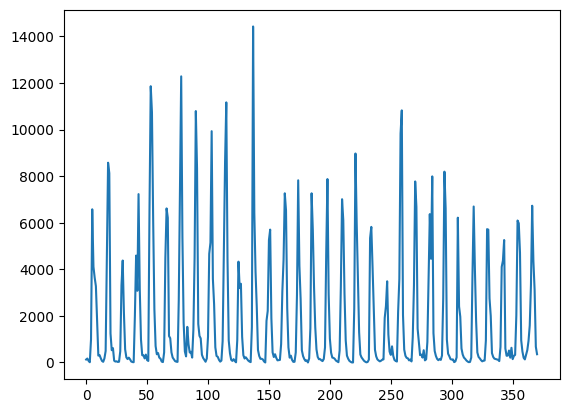

In [ ]:
import pandas
import matplotlib.pyplot as plt
dataframe = pd.read_csv('/content/data.csv',header=1)
plt.plot(dataframe)
plt.show()

In [ ]:
numpy.random.seed(712555)

In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
train = dataset[0:261]
validate=dataset[261:316]
test=dataset[316:372]
print(len(train),len(validate),len(test))

261 55 55


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
validateX, validateY = create_dataset(validate, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
validateX = numpy.reshape(validateX, (validateX.shape[0], 1,validateX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(500,input_dim=look_back))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam',metrics=['mae', 'acc'])
history= model.fit(trainX, trainY, epochs=500, batch_size=10,validation_split=0.1,verbose=1,shuffle=True)

Epoch 1/500
23/23 [==============================] - 3s 30ms/step - loss: 0.0259 - mae: 0.1068 - acc: 0.0135 - val_loss: 0.0191 - val_mae: 0.0918 - val_acc: 0.0000e+00
Epoch 2/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0168 - mae: 0.0765 - acc: 0.0135 - val_loss: 0.0158 - val_mae: 0.0652 - val_acc: 0.0000e+00
Epoch 3/500
23/23 [==============================] - 0s 5ms/step - loss: 0.0144 - mae: 0.0693 - acc: 0.0135 - val_loss: 0.0160 - val_mae: 0.0658 - val_acc: 0.0000e+00
Epoch 4/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0140 - mae: 0.0694 - acc: 0.0135 - val_loss: 0.0153 - val_mae: 0.0670 - val_acc: 0.0000e+00
Epoch 5/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0144 - mae: 0.0707 - acc: 0.0135 - val_loss: 0.0155 - val_mae: 0.0660 - val_acc: 0.0000e+00
Epoch 6/500
23/23 [==============================] - 0s 6ms/step - loss: 0.0140 - mae: 0.0661 - acc: 0.0135 - val_loss: 0.0143 - val_mae: 0.0713 - val_acc: 0.0000e+

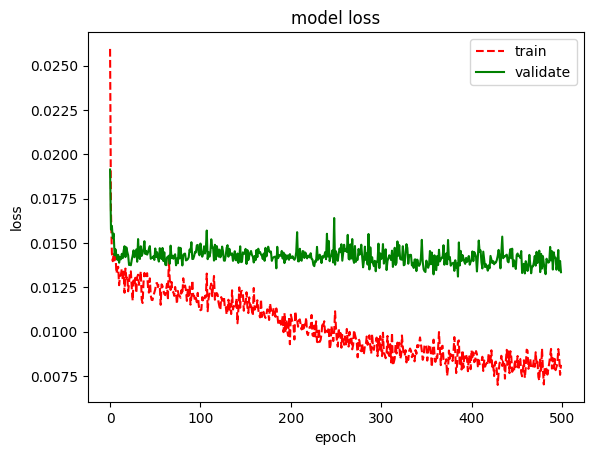

In [ ]:
plt.plot(history.history['loss'], ls='--',color='r')
plt.plot(history.history['val_loss'], ls='-',color='g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
validatePredict = model.predict(validateX)

2/2 [==============================] - 0s 9ms/step


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
validatePredict = scaler.inverse_transform(validatePredict)
validateY = scaler.inverse_transform([validateY])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 1282.98 RMSE


In [ ]:
# import required modules
import numpy as np
from random import randrange
import matplotlib.pyplot as plt

In [ ]:
def filter_nan(s,o):
    """
    this functions removed the data  from simulated and observed data
    whereever the observed data contains nan
    this is used by all other functions, otherwise they will produce nan as
    output
    """
    data = np.array([s.flatten(),o.flatten()])
    data = np.transpose(data)
    data = data[~np.isnan(data).any(1)]
    return data[:,0],data[:,1]

In [ ]:
def NS(s,o):
    """
    Nash Sutcliffe efficiency coefficient
    input:
        s: simulated
        o: observed
    output:
        ns: Nash Sutcliffe efficient coefficient
    """
    s,o = filter_nan(s,o)
    return 1 - sum((s-o)**2)/sum((o-np.mean(o))**2)

In [ ]:
def rmse(s,o):
    """
    Root Mean Squared Error
    input:
        s: simulated
        o: observed
    output:
        rmses: root mean squared error
    """
    s,o = filter_nan(s,o)
    return np.sqrt(np.mean((s-o)**2))

In [ ]:
def mae(s,o):
    """
    Mean Absolute Error
    input:
        s: simulated
        o: observed
    output:
        maes: mean absolute error
    """
    s,o = filter_nan(s,o)
    return np.mean(abs(s-o))

In [ ]:
def NS(s,o):
    """
    Nash Sutcliffe efficiency coefficient
    input:
        s: simulated
        o: observed
    output:
        ns: Nash Sutcliffe efficient coefficient
    """
    s,o = filter_nan(s,o)
    return 1 - sum((s-o)**2)/sum((o-np.mean(o))**2)

In [ ]:
def correlation(s,o):
    """
    correlation coefficient
    input:
        s: simulated
        o: observed
    output:
        correlation: correlation coefficient
    """
    s,o = filter_nan(s,o)
    if s.size == 0:
        corr = np.NaN
    else:
        corr = np.corrcoef(o, s)[0,1]

    return corr

In [ ]:
print(rmse(trainY[0], trainPredict[:,0]))
print(rmse(validateY[0], validatePredict[:,0]))
print(rmse(testY[0], testPredict[:,0]))

1282.9802069964821
1512.325751386858
1102.370267966455
